In [7]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F

In [8]:
torch.manual_seed(42)
np.random.seed(42)

In [9]:
class Generator(nn.Module):

    def __init__(self, data_shape=(1, 28, 28), noise_shape=(100,)):
        super().__init__()
        
        self.noise_shape = noise_shape
        self.noise_dim = np.prod(noise_shape)
        
        self.data_shape = data_shape
        self.data_dim = np.prod(data_shape)

        self.generator = nn.Sequential(
            nn.Linear(self.noise_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, self.data_dim),
            nn.Tanh()
        )

    def forward(self, noise):
        noise = noise.view(-1, self.noise_dim)
        return self.generator(noise).view(-1, *self.data_shape)

In [10]:
data_shape = (1, 28, 28)
noise_shape = (128,)
noise = torch.randn(16, *noise_shape)

In [11]:
gen = Generator(data_shape=data_shape, noise_shape=noise_shape)

loaded_state_dict = torch.load(f"saved_models/gen_basic.pt", map_location=torch.device('cpu'))
gen.load_state_dict(loaded_state_dict)
gen.eval()

Generator(
  (generator): Sequential(
    (0): Linear(in_features=128, out_features=256, bias=True)
    (1): ReLU()
    (2): Linear(in_features=256, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=1024, bias=True)
    (5): ReLU()
    (6): Linear(in_features=1024, out_features=784, bias=True)
    (7): Tanh()
  )
)

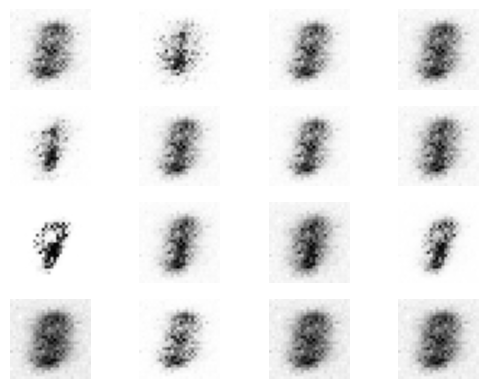

In [6]:
x_hat = gen(noise)
generated_images = x_hat.detach().numpy().reshape(-1, 28, 28)

plt.figure()

for i, img in enumerate(generated_images):
    plt.subplot(4, 4, i+1)
    plt.imshow(img, cmap='binary')
    plt.axis('off')

plt.draw()